In [1]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
import numpy as np

/usr/local/lib/python3.6/dist-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
ls

drive/  sample_data/


In [5]:
cd /content/drive/My Drive/C13550/Lesson07/Exercise02-03

[Errno 2] No such file or directory: '/drive/My Drive/C13550/Lesson07/Exercise02-03'
/content


In [0]:
glove_input_file = 'utils/glove.6B.50d.txt'
word2vec_output_file = 'utils/glove.6B.50d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 50)

In [0]:
filename = 'utils/glove.6B.50d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [0]:
model.similarity('woman', 'queen')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.60031056

In [0]:
model['woman']

array([-1.8153e-01,  6.4827e-01, -5.8210e-01, -4.9451e-01,  1.5415e+00,
        1.3450e+00, -4.3305e-01,  5.8059e-01,  3.5556e-01, -2.5184e-01,
        2.0254e-01, -7.1643e-01,  3.0610e-01,  5.6127e-01,  8.3928e-01,
       -3.8085e-01, -9.0875e-01,  4.3326e-01, -1.4436e-02,  2.3725e-01,
       -5.3799e-01,  1.7773e+00, -6.6433e-02,  6.9795e-01,  6.9291e-01,
       -2.6739e+00, -7.6805e-01,  3.3929e-01,  1.9695e-01, -3.5245e-01,
        2.2920e+00, -2.7411e-01, -3.0169e-01,  8.5286e-04,  1.6923e-01,
        9.1433e-02, -2.3610e-02,  3.6236e-02,  3.4488e-01, -8.3947e-01,
       -2.5174e-01,  4.2123e-01,  4.8616e-01,  2.2325e-02,  5.5760e-01,
       -8.5223e-01, -2.3073e-01, -1.3138e+00,  4.8764e-01, -1.0467e-01],
      dtype=float32)

In [0]:
model.similar_by_word('woman')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('girl', 0.9065280556678772),
 ('man', 0.8860336542129517),
 ('mother', 0.8763703107833862),
 ('her', 0.86131352186203),
 ('boy', 0.8596119284629822),
 ('she', 0.8430695533752441),
 ('herself', 0.8224567770957947),
 ('child', 0.8108214735984802),
 ('wife', 0.8037394881248474),
 ('old', 0.7982394695281982)]

In [0]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
close_words=model.similar_by_word('woman')
 
arr = np.empty((0,50), dtype='f')
labels = ['woman']
#Array with the vectors of the closest words
arr = np.append(arr, np.array([model['woman']]), axis=0)
print("Matrix with the word 'woman':\n", arr)

Matrix with the word 'woman':
 [[-1.8153e-01  6.4827e-01 -5.8210e-01 -4.9451e-01  1.5415e+00  1.3450e+00
  -4.3305e-01  5.8059e-01  3.5556e-01 -2.5184e-01  2.0254e-01 -7.1643e-01
   3.0610e-01  5.6127e-01  8.3928e-01 -3.8085e-01 -9.0875e-01  4.3326e-01
  -1.4436e-02  2.3725e-01 -5.3799e-01  1.7773e+00 -6.6433e-02  6.9795e-01
   6.9291e-01 -2.6739e+00 -7.6805e-01  3.3929e-01  1.9695e-01 -3.5245e-01
   2.2920e+00 -2.7411e-01 -3.0169e-01  8.5286e-04  1.6923e-01  9.1433e-02
  -2.3610e-02  3.6236e-02  3.4488e-01 -8.3947e-01 -2.5174e-01  4.2123e-01
   4.8616e-01  2.2325e-02  5.5760e-01 -8.5223e-01 -2.3073e-01 -1.3138e+00
   4.8764e-01 -1.0467e-01]]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
for w in close_words:
    w_vector = model[w[0]]
    labels.append(w[0])
    arr = np.append(arr, np.array([w_vector]), axis=0)
arr

array([[-1.8153e-01,  6.4827e-01, -5.8210e-01, -4.9451e-01,  1.5415e+00,
         1.3450e+00, -4.3305e-01,  5.8059e-01,  3.5556e-01, -2.5184e-01,
         2.0254e-01, -7.1643e-01,  3.0610e-01,  5.6127e-01,  8.3928e-01,
        -3.8085e-01, -9.0875e-01,  4.3326e-01, -1.4436e-02,  2.3725e-01,
        -5.3799e-01,  1.7773e+00, -6.6433e-02,  6.9795e-01,  6.9291e-01,
        -2.6739e+00, -7.6805e-01,  3.3929e-01,  1.9695e-01, -3.5245e-01,
         2.2920e+00, -2.7411e-01, -3.0169e-01,  8.5286e-04,  1.6923e-01,
         9.1433e-02, -2.3610e-02,  3.6236e-02,  3.4488e-01, -8.3947e-01,
        -2.5174e-01,  4.2123e-01,  4.8616e-01,  2.2325e-02,  5.5760e-01,
        -8.5223e-01, -2.3073e-01, -1.3138e+00,  4.8764e-01, -1.0467e-01],
       [-3.4471e-01,  6.9563e-01, -7.8086e-01, -5.8482e-01,  1.2263e+00,
         1.2544e+00, -7.6466e-01,  4.0575e-01,  1.8862e-01,  9.8834e-02,
         3.2557e-01, -3.1816e-01,  2.3869e-01,  3.3554e-01,  1.0592e+00,
        -2.5266e-01, -1.0308e+00,  7.0027e-01,  3.

In [0]:
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svdvals = svd.fit_transform(arr)

In [0]:
df = pd.DataFrame(svdvals, index=labels, columns=['x', 'y'])
print("2-dimensional vectors of words:")
df

2-dimensional vectors of words:


,x,y
woman,5.315709,0.644259
girl,5.165819,1.119220
man,4.658431,1.512355
mother,5.335070,-0.866044
her,5.655957,-1.174072
boy,4.729534,1.616869
she,5.210190,-1.161822
herself,4.172136,-1.430208
child,4.674085,-0.234345
wife,4.968078,-1.601884


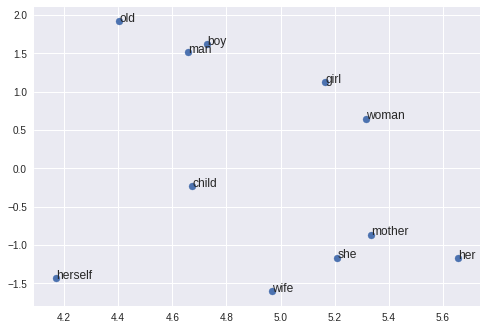

In [0]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for word, pos in df.iterrows():
    ax.annotate(word, pos)

ax.scatter(df['x'], df['y'])
plt.show()